# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import shap

import warnings
warnings.filterwarnings('ignore')

import pickle

# View Dataset

In [2]:
df = pd.read_csv("epilepsy.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,4


In [32]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to OUTPUT_LABEL
dtypes: int64(179)
memory usage: 15.7 MB


In [4]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [6]:
df['OUTPUT_LABEL'].value_counts()

0    9200
1    2300
Name: OUTPUT_LABEL, dtype: int64

In [7]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0
11499,29,41,57,72,74,62,54,43,31,23,...,-59,-25,-4,2,5,4,-2,2,20,0


In [8]:
#An ictal sample

[<matplotlib.lines.Line2D at 0x1a1b079f98>]

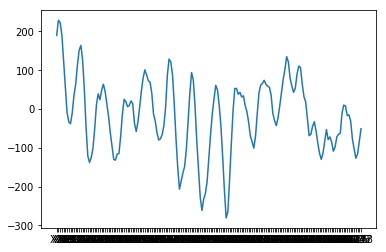

In [9]:
sampled_sample1=df.iloc[0,:]
sampled_sample1=sampled_sample1[1:len(sampled_sample1)-1]
plt.plot(sampled_sample1)


In [10]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(df["OUTPUT_LABEL"].values)
)

prevalence of the positive class: 0.200


## Data Pre-processing and Feature Engineering

In [11]:
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["OUTPUT_LABEL"]]

In [12]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

set()
set()


In [13]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

# Test/Train Split

In [14]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [15]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]
n = np.min([len(df_train_pos), len(df_train_neg)])
df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)
df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)
print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))


Train balanced prevalence(n = 3162):0.500


In [16]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

pickle.dump(cols_input, open('cols_input.sav', 'wb'))
# a function to fill missing values with mean of the column if needed
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [17]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (8050, 178)
Training shapes: (3162, 178) (3162,)
Validation shapes: (1725, 178) (1725,)


# Balancing the Dataset and Setting Threshold

In [18]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity


In [19]:
thresh = 0.5

# K Nearest Neighbors

In [20]:
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.993
accuracy:0.618
recall:0.236
precision:0.997
specificity:0.999
prevalence:0.500
 
Validation:
AUC:0.963
accuracy:0.841
recall:0.237
precision:0.955
specificity:0.997
prevalence:0.205
 


# Logistic Regression

In [21]:
lr = LogisticRegression(random_state = 69)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.636
accuracy:0.681
recall:0.534
precision:0.757
specificity:0.829
prevalence:0.500
 
Validation:
AUC:0.519
accuracy:0.750
recall:0.415
precision:0.395
specificity:0.836
prevalence:0.205
 


# Decision Tree Classifier

In [22]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 69)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=69,
            splitter='best')

In [23]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, \
tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, \
tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.987
accuracy:0.978
recall:0.966
precision:0.991
specificity:0.991
prevalence:0.500
 
Validation:
AUC:0.856
accuracy:0.906
recall:0.839
precision:0.739
specificity:0.923
prevalence:0.205
 


# Random Forest Classifier

In [24]:
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, \
rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, \
rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.995
accuracy:0.964
recall:0.947
precision:0.981
specificity:0.982
prevalence:0.500
 
Validation:
AUC:0.987
accuracy:0.946
recall:0.904
precision:0.842
specificity:0.956
prevalence:0.205
 


# Extra Trees Classifier

In [25]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, etc_train_precision, \
etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, etc_valid_precision, \
etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Extra Trees Classifier
Training:
AUC:1.000
accuracy:0.995
recall:0.997
precision:0.993
specificity:0.993
prevalence:0.500
 
Validation:
AUC:0.994
accuracy:0.959
recall:0.955
precision:0.862
specificity:0.961
prevalence:0.205
 


# Comparative Analysis of model performance

In [26]:

df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','DT','DT','RF','RF','ETC','ETC', '', '', '', '', '', '', '', ''],
                           'data_set':['train','valid']*9,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,etc_train_auc,etc_valid_auc, 0, 0, 0, 0, 0, 0, 0, 0],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,etc_train_accuracy,etc_valid_accuracy, 0, 0, 0, 0, 0, 0, 0, 0],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,etc_train_recall,etc_valid_recall, 0, 0, 0, 0, 0, 0, 0, 0],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,etc_train_precision,etc_valid_precision, 0, 0, 0, 0, 0, 0, 0, 0],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,etc_train_specificity,etc_valid_specificity, 0, 0, 0, 0, 0, 0, 0, 0]})





In [27]:
%matplotlib inline
sns.set(style="whitegrid")

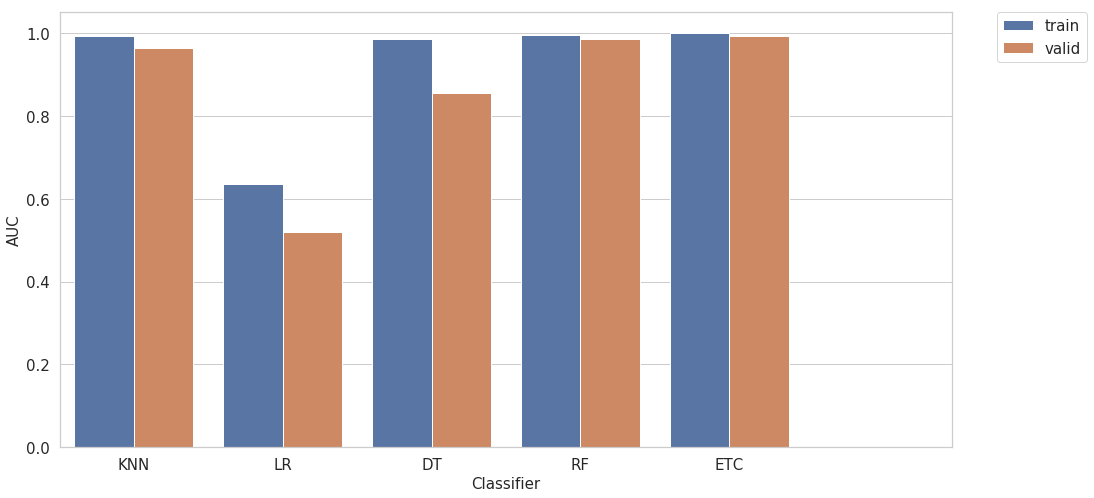

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

# Feature Reduction

In [29]:
feature_importances = pd.DataFrame(etc.feature_importances_, index = cols_input, columns=['importance']).sort_values('importance', ascending=False)

In [30]:
feature_importances.head()

,importance
X38,0.017610
X126,0.015787
X173,0.015606
X37,0.015098
X44,0.014422


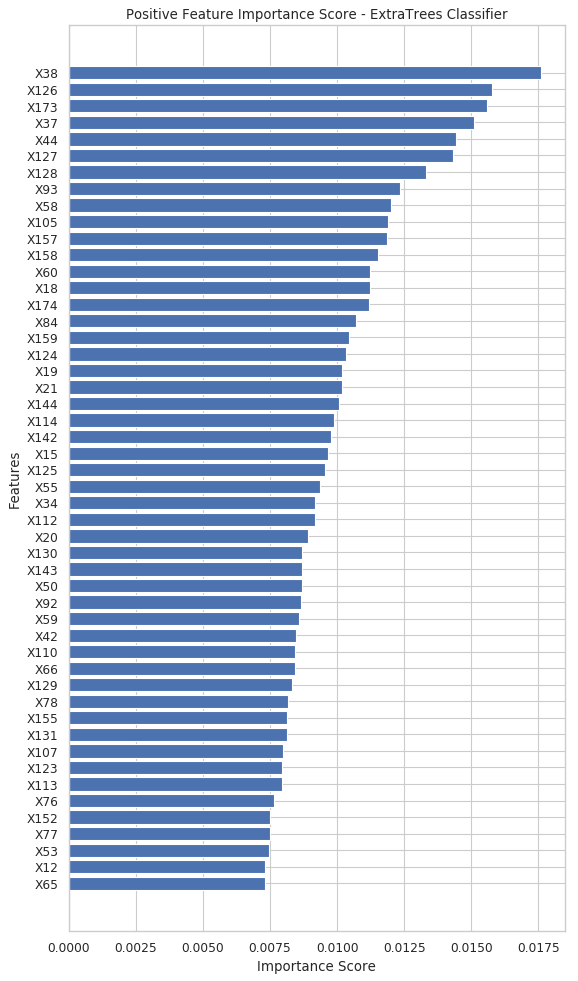

In [31]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()